<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista10 - BERT
**Nome:** Davy Alves de Souza

**Numero USP:** 11561247 









______________




O objetivo desta lista é fazer com que vocês se familiarizem com o BERT por meio da biblioteca HuggingFace. Novamente, as questões 1 2 e 3 podem ser copiadas de listas anteriores.

In [10]:
#!pip install transformers

In [11]:
# !nvidia-smi

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from transformers import (
    BertTokenizer,
    TFBertForSequenceClassification,
    TFTrainer,
    TFTrainingArguments,
)

from sklearn.model_selection import train_test_split

### Importando os dados como um dataframe

Para esta lista nós utilizaremos o dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [13]:
b2wCorpus = pd.read_csv("https://raw.githubusercontent.com/davysouza/NLPortugues/master/data/b2w-10k.csv")
b2wCorpus.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958,F,RJ,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996,M,SC,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984,M,SP,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985,F,SP,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994,M,MG,NaN,NaN,NaN,NaN,NaN


In [14]:
b2wCorpus["review_text"]

0       Estou contente com a compra entrega rápida o ú...
1       Por apenas R$1994.20,eu consegui comprar esse ...
2       SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3       MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4       A entrega foi no prazo, as americanas estão de...
                              ...                        
9994    Celular muito rápido, com processador e armaze...
9995    achei o produto muito frágil, o material veio ...
9996    Uma porcaria pois ñ recebi ñ recomendo pra nin...
9997    Maquina excelente,super pratica. recomendo.ent...
9998    Agradeço pelo compromisso, obrigado. ,...........
Name: review_text, Length: 9999, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar. 
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [15]:
b2wCorpus["reviewer_gender"].value_counts()

M                                                                         5033
F                                                                         4624
1970                                                                         1
Ocorrência: Z-Devolução Em Andamento Ao Cd de São Paulo 22/12/17 16:12       1
                                                                             1
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend". 

b) Converta a coluna "recommend_to_a_friend" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


In [16]:
# Selecionando colunas relevantes
processed_data = b2wCorpus[['review_text', 'recommend_to_a_friend']]

# Convertendo str to int [recommend_to_a_friend]
processed_data = processed_data.replace(['Yes', 'No'], [1, 0])

# resultado dos dados processados 
processed_data

,review_text,recommend_to_a_friend
0,Estou contente com a compra entrega rápida o ú...,1
1,"Por apenas R$1994.20,eu consegui comprar esse ...",1
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1
4,"A entrega foi no prazo, as americanas estão de...",1
...,...,...
9994,"Celular muito rápido, com processador e armaze...",1
9995,"achei o produto muito frágil, o material veio ...",0
9996,Uma porcaria pois ñ recebi ñ recomendo pra nin...,0
9997,"Maquina excelente,super pratica. recomendo.ent...",1


### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [17]:
# Shuffle data
processed_data = processed_data.sample(frac=1).reset_index(drop=True)

# Split data
train, validate, test = np.split(processed_data, [int(.65 * len(processed_data)), int(.75 * len(processed_data))])

# train
x_train = train[['review_text']].values.tolist()
y_train = train[['recommend_to_a_friend']].values.tolist()
y_train = np.array([s for [s] in y_train])

# validate
x_validate = validate[['review_text']].values.tolist()
y_validate = np.array(validate[['recommend_to_a_friend']].values.tolist())
y_validate = np.array([s for [s] in y_validate])

# test
x_test = test[['review_text']].values.tolist()
y_test = np.array(test[['recommend_to_a_friend']].values.tolist())
y_test = np.array([s for [s] in y_test])

### Tokenizando

Para aplicar o processo de _Tokenize_ dos nossos dados, diferente das listas anteriores, utilizaremos a classe [BertTokenizer](https://huggingface.co/transformers/master/model_doc/bert.html#berttokenizer) da biblioteca [transformers](https://github.com/huggingface/transformers) do HuggingFace.

Para isso, veja o exemplo abaixo:


In [18]:
REF_MODEL = 'neuralmind/bert-base-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(REF_MODEL)
text = pd.DataFrame(["isso é um text", "o rato roeu a roupa", "do rei de Roma"])

text.values.tolist()

[['isso é um text'], ['o rato roeu a roupa'], ['do rei de Roma']]

In [29]:
SEQ_LEN=5
encoded_text = tokenizer(
    text.values.tolist(),
    text_pair=None,
    is_split_into_words=True,
    padding="max_length",
    truncation=True,
    max_length=SEQ_LEN,
    pad_to_max_length=True,
    return_tensors='tf'
)
encoded_text_labels = np.array([0,0,1])

tokenizer.tokenize("[CLS] o rato roeu a roupa [SEP] ratao [SEP]")



['[CLS]',
 'o',
 'ra',
 '##to',
 'ro',
 '##eu',
 'a',
 'roupa',
 '[SEP]',
 'ra',
 '##ta',
 '##o',
 '[SEP]']

Como é possível ver, o resultado gera um dicionário com 3 chaves, representando diferentes tensores:

    - input_ids (os arrays de entrada convertidos para inteiro)
    - token_type_ids (Indicação se pertence a sentença A ou B [0 é sentença A e 1 é sentença B])
    - attention_mask (indicando quais tokens foram mascarados. Como todos os tokens **não** foram mascarados, o valor aqui sempre é 1)

## <font color='blue'>Questão 3 </font>

Aplique o tokenizer nos dados de treino e teste, gerando duas variáveis **encoded_train** e **encoded_test**, considerando o max_length como o tamanho da sentença ideal. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

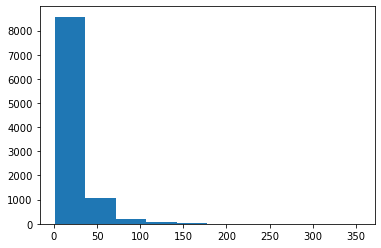

In [8]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

In [9]:
# Seu código aqui
max_len=50

encoded_train = tokenizer(
    x_train,
    text_pair=None,
    is_split_into_words=True,
    padding="max_length",
    truncation=True,
    max_length=max_len,
    pad_to_max_length=True,
    return_tensors='tf'
)

encoded_train_labels = y_train

encoded_train

{'input_ids': <tf.Tensor: shape=(6499, 50), dtype=int32, numpy=
array([[  101,   503,   681, ...,   119,   119,   102],
       [  101,   959, 22295, ...,     0,     0,     0],
       [  101, 20931,   244, ...,     0,     0,     0],
       ...,
       [  101,  8399,   146, ...,     0,     0,     0],
       [  101, 17938,  7032, ...,     0,     0,     0],
       [  101,   231,  3576, ...,     0,     0,     0]])>, 'token_type_ids': <tf.Tensor: shape=(6499, 50), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(6499, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [10]:
# Seu código aqui
encoded_validate = tokenizer(
    x_validate,
    text_pair=None,
    is_split_into_words=True,
    padding="max_length",
    truncation=True,
    max_length=max_len,
    pad_to_max_length=True,
    return_tensors='tf'
)

encoded_validate_labels = y_validate

encoded_validate

{'input_ids': <tf.Tensor: shape=(1000, 50), dtype=int32, numpy=
array([[  101,  2174,  8393, ...,     0,     0,     0],
       [  101,  4407,   852, ...,     0,     0,     0],
       [  101, 21572,  2267, ...,     0,     0,     0],
       ...,
       [  101, 11690,   179, ...,     0,     0,     0],
       [  101,  3576,  1941, ...,     0,     0,     0],
       [  101,   851, 15249, ...,     0,     0,     0]])>, 'token_type_ids': <tf.Tensor: shape=(1000, 50), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(1000, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [11]:
# Seu código aqui
encoded_test = tokenizer(
    x_test,
    text_pair=None,
    is_split_into_words=True,
    padding="max_length",
    truncation=True,
    max_length=max_len,
    pad_to_max_length=True,
    return_tensors='tf'
)

encoded_test_labels = y_test

encoded_test

{'input_ids': <tf.Tensor: shape=(2500, 50), dtype=int32, numpy=
array([[  101, 14589, 22281, ...,     0,     0,     0],
       [  101,  3576,   785, ...,     0,     0,     0],
       [  101,   177,  9349, ...,  1821,  1934,   102],
       ...,
       [  101,   231, 13187, ...,     0,     0,     0],
       [  101,  8169,   183, ...,     0,     0,     0],
       [  101,   231, 12981, ...,     0,     0,     0]])>, 'token_type_ids': <tf.Tensor: shape=(2500, 50), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(2500, 50), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [12]:
encoded_train.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

### Montando o modelo

Para montar o modelo, iremos utilizar a classe TFBertForSequenceClassification, do HuggingFace

Aqui tem um exemplo de código para vocês seguirem!


In [ ]:
bert_model = TFBertForSequenceClassification.from_pretrained(REF_MODEL, from_pt=True, num_labels=2)
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_token', dtype='int32')
input_masks_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='masked_token', dtype='int32')

X = bert_model(input_ids, input_masks_ids)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, input_masks_ids], outputs = X)
model.summary()

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-5)
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]
model.compile(opt, "sparse_categorical_crossentropy", metrics=["acc"])

In [ ]:
history = model.fit(
    [encoded_text["input_ids"], encoded_text["attention_mask"]],
    encoded_text_labels,
    batch_size=32,
    epochs=2,
    callbacks=my_callbacks,
)

## Treinando e avaliando seu modelo

###  <font color='blue'>Questão 4 </font>

Defina e treine seu modelo.

**Lembre-se de tambem adicionar os dados de validação do modelo**

In [13]:
bert_model_pretrained = TFBertForSequenceClassification.from_pretrained(REF_MODEL, from_pt=True, num_labels=2)
input_ids_layer       = tf.keras.layers.Input(shape=(max_len,), name='input_token', dtype='int32')
input_masks_ids_layer = tf.keras.layers.Input(shape=(max_len,), name='masked_token', dtype='int32')

X = bert_model_pretrained(input_ids_layer, input_masks_ids_layer)[0]
X = tf.keras.layers.Dense(50, activation='relu')(X)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(2, activation='sigmoid')(X)

model = tf.keras.Model(inputs=[input_ids_layer, input_masks_ids_layer], outputs=X)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the P

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 50)]         0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 50)]         0                                            
__________________________________________________________________________________________________
tf_bert_for_sequence_classifica ((None, 2),)         108924674   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           150         tf_bert_for_sequence_c

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [16]:
history = model.fit(
    [encoded_train["input_ids"], encoded_train["attention_mask"]],
    encoded_train_labels,
    batch_size=32,
    epochs=10,
    validation_data=([encoded_validate["input_ids"], encoded_validate["attention_mask"]], encoded_validate_labels),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)]
)

Epoch 1/10
204/204 [==============================] - 101s 497ms/step - loss: 0.4462 - accuracy: 0.8551 - val_loss: 0.2682 - val_accuracy: 0.9230
Epoch 2/10
204/204 [==============================] - 99s 483ms/step - loss: 0.2759 - accuracy: 0.9214 - val_loss: 0.2219 - val_accuracy: 0.9250
Epoch 3/10
204/204 [==============================] - 99s 484ms/step - loss: 0.2054 - accuracy: 0.9443 - val_loss: 0.2084 - val_accuracy: 0.9180
Epoch 4/10
204/204 [==============================] - 99s 484ms/step - loss: 0.1672 - accuracy: 0.9594 - val_loss: 0.2204 - val_accuracy: 0.9250
Epoch 5/10
204/204 [==============================] - 99s 484ms/step - loss: 0.1316 - accuracy: 0.9688 - val_loss: 0.2612 - val_accuracy: 0.9310


In [17]:
model.evaluate(x=[encoded_test["input_ids"], encoded_test["attention_mask"]], y=encoded_test_labels)

79/79 [==============================] - 12s 158ms/step - loss: 0.2583 - accuracy: 0.9280


[0.2583104074001312, 0.9279999732971191]